### Random-walk sampler of decomposable graphs

This script implements a random walk sampler of decomposable graphs. 

The sampler is feasible for small graph. 


In [122]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import parallelDG.graph.graph as glib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [137]:
def nei_tree_nodes(nodes, tree):
    nei_list = list()
    for n in nodes:
        nei_list= nei_list + list(tree.neighbors(n))
    return nei_list

def first_visit_random_walk(tree):
    visited = list()
    attempted = list()
    initial_clique = np.random.choice(tree.nodes())
    visited.append(initial_clique)
    next_visit = set(nei_tree_nodes(visited, tree)) - (set(visited) | set(attempted))
    while next_visit: 
        new_clq = np.random.choice(list(next_visit))
        if np.random.uniform() <=0.5: 
            visited.append(new_clq)
        else:
            attempted.append(new_clq)
        next_visit = set(nei_tree_nodes(visited, tree)) - (set(visited) | set(attempted))
    return sorted(visited)

def decomposable_graph(n):
    tree = nx.random_tree(n)
    jt = dict()
    for i in range(n):
        jt[i] = first_visit_random_walk(tree)
    return jt

def to_adj(a):
    p = len(a)
    z = np.zeros(p).reshape(1,p)
    eyes = np.eye(p)
    for node, mem in a.items():
        z = np.append(z, eyes[mem].sum(axis=0).reshape(1,p), axis=0)
    z = z[1:]
    A = (np.matmul(z, z.T) > 0 )*1 - eyes
    return nx.from_numpy_matrix(A)

def hash_graph(G):
    return hash(str(G.edges()))

def count_decomposable_graphs(size, num_iteration):
    ## counting the number of decomposable graphs
    itera = num_iteration
    p = size
    graph_counts = dict()
    for i in range(int(itera)):
        a = decomposable_graph(p) 
        g = to_adj(a)
        b = hash_graph(g)
        if b in graph_counts:
            graph_counts[b]['count'] += 1.0
        else: 
            graph_counts[b] = {'count': 1.0, 'nedges': g.size(), 'nnodes': g.order(), 'g': g.edges()}
    return graph_counts

def pdf(x):
    a = np.sum(x)
    b = np.cumsum(x)
    pd.Series(b/a).plot()
    

def get_value(value_str, di):
    return [g[value_str] for g in di.values()]

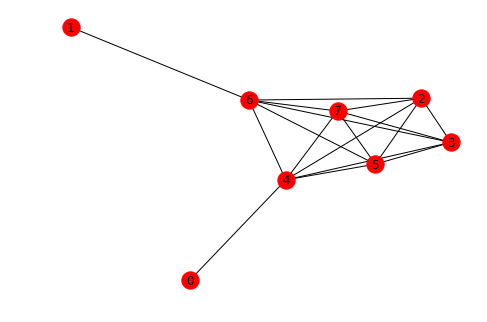

In [124]:
## Sample of single decomposable graph
p = 8
a = decomposable_graph(p) 
nx.draw(to_adj(a), with_labels=True)

In [129]:
## counting the number of decomposable graphs
p = 5
itera = 100000
graph_counts = count_decomposable_graphs(p, itera)

In [130]:
# the correct number of decomposable graphs of size 6 is 821
len(graph_counts)

822

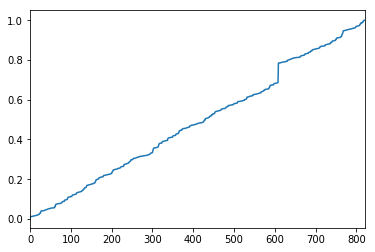

In [138]:
pdf(get_value('count', graph_counts))

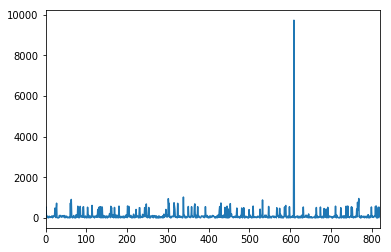

In [139]:
pd.Series(get_value('count', graph_counts)).plot()

In [141]:
np.array(get_value('count', graph_counts)).idxmax()

AttributeError: 'numpy.ndarray' object has no attribute 'idxmax'

In [396]:
c_list = []
for i in range(100):
    print(i)
    c_list.append(count_decomposable_graphs(4, 10000))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [397]:
np.mean(c_list)

61.0

In [398]:
np.std(c_list)

0.0

In [403]:
c_list = []
for i in range(100):
    print(i)
    c_list.append(count_decomposable_graphs(5, 100000))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [404]:
np.std(c_list)

0.523354564325181